In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers
from tensorflow.keras.layers import (Dense, Activation, Flatten, Dropout, Conv2D, Conv2DTranspose,
                                     MaxPooling2D, LeakyReLU)
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [2]:
print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.13.1


Train Images Shape: (60000, 28, 28)
Train Labels Length: 60000
Test Images Shape: (10000, 28, 28)
Test Labels Length: 10000


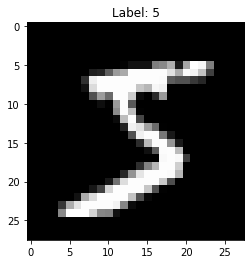

In [3]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

data = mnist.load_data

# Display information about the dataset
print("Train Images Shape:", x_train.shape)
print("Train Labels Length:", len(y_train))
print("Test Images Shape:", x_test.shape)
print("Test Labels Length:", len(y_test))

# Visualize a sample image
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


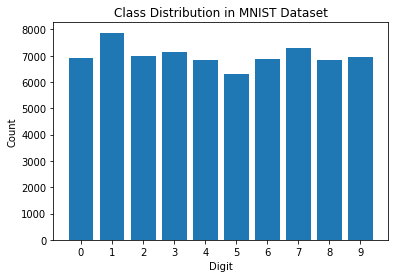

In [4]:
all_labels = np.concatenate([y_train, y_test])
all_labels = all_labels.flatten()

# Count the occurrences of each digit in the dataset
label_counts = np.bincount(all_labels)


# Plot the class distribution
digits = np.arange(10)
plt.bar(digits, label_counts)  # Exclude label 0 for better visualization
plt.xticks(digits)
plt.xlabel('Digit')
plt.ylabel('Count')
plt.title('Class Distribution in MNIST Dataset')
output_directory = 'figures'
os.makedirs(output_directory, exist_ok=True)

# Save the plot as an image with a specific file path
output_file_path = os.path.join(output_directory, 'class_distribution_mnist.png')
plt.savefig(output_file_path)

plt.show()

In [5]:
num_training_features = x_train.shape[0]
print("Number of training features:", num_training_features)

# Display the number of features in the testing set
num_testing_features = x_test.shape[0]
print("Number of testing features:", num_testing_features)

Number of training features: 60000
Number of testing features: 10000


In [6]:
# Reshape and normalize the input data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

In [7]:
y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

In [8]:
seed_value = 42
tf.random.set_seed(seed_value)

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))  
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(128, activation='relu'))
#model.add(Dropout(rate=0.25))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model 
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
accuracy = model.evaluate(x_test, y_test)[1]
print("Test Accuracy:", accuracy)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2620 - accuracy: 0.9213 - val_loss: 0.1346 - val_accuracy: 0.9592
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1171 - accuracy: 0.9646 - val_loss: 0.1125 - val_accuracy: 0.9663
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0898 - accuracy: 0.9733 - val_loss: 0.0987 - val_accuracy: 0.9720
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0724 - accuracy: 0.9790 - val_loss: 0.0977 - val_accuracy: 0.9712
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0801 - accuracy: 0.9757
Test Accuracy: 0.9757000207901001


In [9]:
seed_value = 42
tf.random.set_seed(seed_value)

model = Sequential()

model.add(Flatten(input_shape=(28, 28)))  
model.add(Dense(256, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model 
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
accuracy = model.evaluate(x_test, y_test)[1]
print("Test Accuracy:", accuracy)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2387 - accuracy: 0.9271 - val_loss: 0.1136 - val_accuracy: 0.9672
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1040 - accuracy: 0.9685 - val_loss: 0.1070 - val_accuracy: 0.9681
Epoch 3/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.1014 - val_accuracy: 0.9714
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0961 - val_accuracy: 0.9730
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0917 - accuracy: 0.9742
Test Accuracy: 0.9742000102996826


In [10]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)


Epoch 1/10
1875/1875 - 5s - loss: 0.0522 - accuracy: 0.9843 - val_loss: 0.0915 - val_accuracy: 0.9757 - 5s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.0412 - accuracy: 0.9876 - val_loss: 0.0884 - val_accuracy: 0.9780 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.0344 - accuracy: 0.9894 - val_loss: 0.0871 - val_accuracy: 0.9779 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.0303 - accuracy: 0.9908 - val_loss: 0.0836 - val_accuracy: 0.9799 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.1041 - val_accuracy: 0.9761 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.0231 - accuracy: 0.9931 - val_loss: 0.0981 - val_accuracy: 0.9790 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.0232 - accuracy: 0.9929 - val_loss: 0.0833 - val_accuracy: 0.9810 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.0212 - accuracy: 0.9937 - val_loss: 0.1211 - val_accuracy: 0.9758 - 4s/epoch - 2ms/step
Epoch 9/

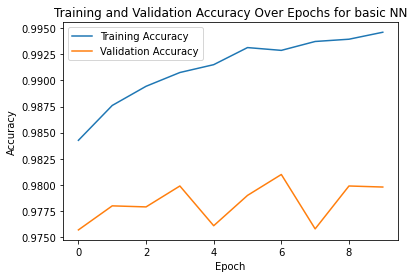

In [11]:
# Plot the training, validation, and test accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for basic NN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('figures/nn_history')
plt.show()

In [12]:
def build_net(xs=[]):
    best_score = 0
    best_x = 0
    for x in xs:
        model = Sequential()

        model.add(Flatten(input_shape=(28, 28))) 
        model.add(Dense(x, activation = 'relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(256, activation='relu'))
        model.add(Dense(128, activation='relu'))
        model.add(Dense(64, activation = 'relu'))
        model.add(Dense(10, activation='softmax'))


        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model 
        model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
        accuracy = model.evaluate(x_test, y_test)[1]
        print("Test Accuracy:", accuracy)
        if accuracy>best_score:
            best_score = accuracy
            best_x = x
    print(f'Best value: {best_x}')
    print(f'best score: {best_score}')
        
    

In [13]:
xs = [64, 128, 256]

build_net(xs)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2860 - accuracy: 0.9130 - val_loss: 0.1568 - val_accuracy: 0.9548
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1340 - accuracy: 0.9585 - val_loss: 0.1280 - val_accuracy: 0.9630
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1031 - accuracy: 0.9685 - val_loss: 0.1065 - val_accuracy: 0.9685
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0835 - accuracy: 0.9748 - val_loss: 0.1057 - val_accuracy: 0.9695
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0911 - accuracy: 0.9734
Test Accuracy: 0.9733999967575073
Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.2652 - accuracy: 0.9192 - val_loss: 0.1384 - val_accuracy: 0.9588
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9642 - val_loss: 0.1260 - val_accuracy: 0.9633
Epoch 3/5

KeyboardInterrupt: 

In [ ]:
preds = model.predict(x_test)

In [ ]:
predicted_labels = np.argmax(preds, axis=1)

os.makedirs('figures/nn/good_pred' ,exist_ok=True)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    for idx, value in enumerate(y_test[i]):
        if value ==1:
            actual = idx
        else:
            pass
    plt.title(f'Actual: {actual}, Predicted: {predicted_labels[i]}')
    plt.savefig(f'figures/nn/good_pred/act_{actual}_pred_{predicted_labels[i]}')
    plt.show()

In [ ]:
#by subtracting the 2 values it creates a difference 
errors = np.abs(preds - y_test)

# Find indices of instances with the highest errors
worst_indices = np.argsort(errors)[::-1][:5]



worst_indices = np.argsort(errors.sum(axis=1))[::-1][:10]
os.makedirs('figures/nn/poor_pred' ,exist_ok=True)

for idx in worst_indices:
    pred_value = preds[idx].argmax()
    
    # Find the true label
    actual = y_test[idx].argmax()

    # Display the image
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'Actual: {actual} Predicted: {pred_value}')
    plt.savefig(f'figures/nn/poor_pred/act_{actual}_pred_{predicted_labels[i]}')
    plt.show()

In [ ]:
# Display the worst predictions and corresponding images
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    index = worst_indices[i]
    predicted_label = np.argmax(preds[index])
    true_label = y_test[index]
    
    ax.imshow(x_test[index], cmap='gray')
    ax.set_title(f"Pred: {predicted_label}\nTrue: {true_label}")
    ax.axis('off')

plt.show()

In [ ]:
cnn_model = Sequential()

#cnn_model.add(Dense(units = 10, input_shape = (28,28)))
cnn_model.add(Conv2D(input_shape =(28, 28, 1), 
                    filters = 4, 
                    kernel_size = (4, 4),
                    padding = 'same'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Conv2D(filters = 4, 
                    kernel_size = (4, 4),
                    padding = 'same', 
                    strides = 2))
cnn_model.add(Flatten())
cnn_model.add(Dense(256, activation = 'relu'))
cnn_model.add(Dense(64, activation = 'relu'))
cnn_model.add(Dense(10, activation = 'softmax'))


In [ ]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
#accuracy = cnn_model.evaluate(x_test, y_test)[1]
#print("Test Accuracy:", accuracy)

In [ ]:
cnn_history = cnn_model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), verbose=2)

accuracy = cnn_model.evaluate(x_test, y_test)[1]
print("Test Accuracy:", accuracy)

In [ ]:
# Plot the training, validation, and test accuracy over epochs
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for CNN')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('figures/cnn_history')
plt.show()

In [ ]:
preds = cnn_model.predict(x_test)

In [ ]:
predicted_labels = np.argmax(preds, axis=1)

os.makedirs('figures/cnn/good_pred' ,exist_ok=True)
for i in range(5):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    for idx, value in enumerate(y_test[i]):
        if value ==1:
            actual = idx
        else:
            pass
    plt.title(f'Actual: {actual}, Predicted: {predicted_labels[i]}')
    plt.savefig(f'figures/cnn/good_pred/act_{actual}_pred_{predicted_labels[i]}')
    plt.show()

In [ ]:
#by subtracting the 2 values it creates a difference 
errors = np.abs(preds - y_test)

# Find indices of instances with the highest errors
worst_indices = np.argsort(errors)[::-1][:5]



worst_indices = np.argsort(errors.sum(axis=1))[::-1][:10]
os.makedirs('figures/cnn/poor_pred' ,exist_ok=True)

for idx in worst_indices:
    pred_value = preds[idx].argmax()
    
    # Find the true label
    actual = y_test[idx].argmax()

    # Display the image
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'Actual: {actual} Predicted: {pred_value}')
    plt.savefig(f'figures/cnn/poor_pred/act_{actual}_pred_{predicted_labels[i]}')
    plt.show()

In [ ]:
def build_net(xs=[]):
    best_score = 0
    best_x = 0
    for x in xs:
        cnn_model = Sequential()

        cnn_model.add(Conv2D(input_shape =(28, 28, 1), 
                    filters = 4, 
                    kernel_size = (4, 4),
                    padding = 'same'))
        #cnn_model.add(Dropout(rate=x))
        cnn_model.add(MaxPooling2D(2,2))
        cnn_model.add(Conv2D(filters = 4, 
                    kernel_size = (4, 4),
                    padding = 'same', 
                    strides = 2))
        cnn_model.add(Flatten())
        cnn_model.add(Dense(256, activation = 'relu'))
        cnn_model.add(Dense(64, activation = 'relu'))
        cnn_model.add(Dense(10, activation = 'softmax'))


        cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model 
        cnn_model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, shuffle=True)

# Evaluate the model on the test set
        accuracy = cnn_model.evaluate(x_test, y_test)[1]
        print("Test Accuracy:", accuracy)
        if accuracy>best_score:
            best_score = accuracy
            best_x = x
    print(f'Best value: {best_x}')
    print(f'best score: {best_score}')
        
    

In [ ]:
xs = [1, 2, 3, 4]

build_net(xs)

In [27]:
def generate_noise(batch_size, noise_dim):
    return np.random.normal(0, 1, size=(batch_size, noise_dim)).astype(np.float32)

In [ ]:
def build_generator(noise_dim, target_image_shape):
    generator = Sequential()

    # Project and reshape the noise
    generator.add(layers.Dense(128 * (target_image_shape[0] // 4) * (target_image_shape[1] // 4), input_dim=noise_dim))
    generator.add(layers.Reshape((target_image_shape[0] // 4, target_image_shape[1] // 4, 128)))

    # Upsample using Conv2DTranspose layers
    generator.add(layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU(alpha=0.2))

    generator.add(layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='same'))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU(alpha=0.2))

    # Output layer
    generator.add(layers.Conv2DTranspose(target_image_shape[1], kernel_size=3, activation='sigmoid', padding='same'))
    generator.add(layers.Conv2D(filters=1, kernel_size=(4, 4), padding='same', strides=2))
    generator.add(layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))
    
    return generator

# Example usage
noise_dim = 100
target_image_shape = (28, 28, 1)  # Assuming MNIST-like data with shape (28, 28, 1)
generator = build_generator(noise_dim, target_image_shape)

generator.summary()

In [ ]:
def build_discriminator(input_shape):
    discriminator = models.Sequential()

    discriminator.add(layers.Conv2D(filters=4, kernel_size=(4, 4), padding='same', input_shape=input_shape))
    discriminator.add(layers.MaxPooling2D(pool_size=(2, 2)))

    discriminator.add(layers.Conv2D(filters=4, kernel_size=(4, 4), padding='same', strides=2))
    discriminator.add(layers.Flatten())

    discriminator.add(layers.Dense(256, activation='relu'))
    discriminator.add(layers.Dense(64, activation='relu'))
    discriminator.add(layers.Dense(10, activation='softmax'))

    return discriminator


def build_discriminator(input_shape):
    discriminator = models.Sequential()
    discriminator.add(layers.Conv2D(filters=4, kernel_size=(4, 4), padding='same', input_shape=input_shape, strides=2))
    discriminator.add(layers.Conv2D(filters=4, kernel_size=(4, 4), padding='same', strides=2))
    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(256, activation='relu'))
    discriminator.add(layers.Dense(64, activation='relu'))
    discriminator.add(layers.Dense(10, activation='relu'))
    discriminator.add(layers.Dense(1, activation='softmax'))
    return discriminator


# Example usage
input_shape = (28, 28, 1)  # Assuming MNIST-like data with shape (28, 28, 1)
discriminator = build_discriminator(input_shape)
    
discriminator.summary()

In [21]:


# Example usage
noise_dim = 100
image_shape = (28, 28, 1)

#generator = build_generator(noise_dim, image_shape)
#discriminator = build_discriminator(image_shape)

# Compile the discriminator separately (you might want to adjust the loss and optimizer)
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the GAN model
discriminator.trainable = False
gan_model = build_gan(generator, discriminator)

# Compile the GAN model
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

# Display model summaries
generator.summary()
discriminator.summary()
gan_model.summary()

NameError: name 'discriminator' is not defined

In [22]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    gan_model = Sequential()
    gan_model.add(generator)
    gan_model.add(discriminator)
    return gan_model

In [ ]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan_model.compile(loss='binary_crossentropy', optimizer='adam')

#batch is problem
batch_size = 60000

# Training loop
epochs = range(11)
print('Progress')
for i, epoch in enumerate(epochs):
    
    current = i + 1
    progress = (current/epochs[-1])*100
    print(f'{progress}%')
    
    # Generate random noise
    noise = generate_noise(batch_size, noise_dim)

    # Generate fake images using the generator
    generated_images = generator.predict(noise)

    # Generate real images (replace this with your real image data)
    real_images = x_train

    # Labels for the discriminator
    fake_labels = np.zeros((batch_size, 1))
    real_labels = np.ones((batch_size, 1))

    # Train the discriminator on real and fake images
    d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

    # Generate new noise for the GAN
    noise = generate_noise(batch_size, noise_dim)

    # Labels for the generator (trick the discriminator)
    valid_labels = np.ones((batch_size, 1))

    # Train the GAN (only the generator part)
    g_loss = gan_model.train_on_batch(noise, valid_labels)

    # Print progress
    print(f"Epoch {epoch+1}/{epochs} [D loss: {d_loss[0]} | D accuracy: {100 * d_loss[1]}] [G loss: {g_loss}]")
    
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), d_loss_values, label='Discriminator Loss')
plt.plot(range(1, epochs + 1), g_loss_values, label='Generator Loss')
plt.title('Discriminator and Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), d_accuracy_values, label='Discriminator Accuracy')
plt.title('Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Progress
10.0%
1875/1875 [==============================] - 50s 27ms/step


Progress
Epoch 1/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.013980148360133171 | D Accuracy: 50.0 | G Loss: 0.20616495609283447
Epoch 2/50
32/32 [==============================] - 1s 25ms/step
D Loss: 0.003126707626506686 | D Accuracy: 50.0 | G Loss: 5.270557403564453
Epoch 3/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 27ms/step
D Loss: 0.005471004522405565 | D Accuracy: 50.0 | G Loss: 5.407749176025391
Epoch 4/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.005233487114310265 | D Accuracy: 50.0 | G Loss: 7.526912212371826
Epoch 5/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 25ms/step
D Loss: 0.0010016572196036577 | D Accuracy: 50.0 | G Loss: 7.2715744972229
Epoch 6/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.004437462775968015 | D Accuracy: 50.0 | G Loss: 7.174365043640137
Epoch 7/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.00029591875136247836 | D Accuracy: 50.0 | G Loss: 7.729072570800781
Epoch 8/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 27ms/step
D Loss: 0.00046625282993773 | D Accuracy: 50.0 | G Loss: 7.790175914764404
Epoch 9/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.0011297781311441213 | D Accuracy: 50.0 | G Loss: 8.42659854888916
Epoch 10/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 27ms/step
D Loss: 0.002355921780690551 | D Accuracy: 50.0 | G Loss: 11.573429107666016
Epoch 11/50
32/32 [==============================] - 1s 25ms/step
D Loss: 0.1612206343561411 | D Accuracy: 50.0 | G Loss: 4.868291854858398
Epoch 12/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.00990030204411596 | D Accuracy: 50.0 | G Loss: 6.79058313369751
Epoch 13/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.0026777939056046307 | D Accuracy: 50.0 | G Loss: 7.310943126678467
Epoch 14/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.019067793153226376 | D Accuracy: 50.0 | G Loss: 7.5451884269714355
Epoch 15/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.013925197767093778 | D Accuracy: 50.0 | G Loss: 8.242782592773438
Epoch 16/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.05550473462790251 | D Accuracy: 50.0 | G Loss: 8.306811332702637
Epoch 17/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.011153442319482565 | D Accuracy: 50.0 | G Loss: 5.733544826507568
Epoch 18/50
32/32 [==============================] - 1s 28ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.06066858023405075 | D Accuracy: 50.0 | G Loss: 6.760278224945068
Epoch 19/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.03418551757931709 | D Accuracy: 50.0 | G Loss: 5.927108287811279
Epoch 20/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.049299861304461956 | D Accuracy: 50.0 | G Loss: 5.6490654945373535
Epoch 21/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.11366887018084526 | D Accuracy: 50.0 | G Loss: 5.647368907928467
Epoch 22/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.027051132172346115 | D Accuracy: 50.0 | G Loss: 6.322463035583496
Epoch 23/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.09132364019751549 | D Accuracy: 50.0 | G Loss: 5.868478298187256
Epoch 24/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.18035368248820305 | D Accuracy: 50.0 | G Loss: 5.6149210929870605
Epoch 25/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 27ms/step
D Loss: 0.027726419270038605 | D Accuracy: 50.0 | G Loss: 4.681063652038574
Epoch 26/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.38525260239839554 | D Accuracy: 50.0 | G Loss: 3.722085952758789
Epoch 27/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.349429689347744 | D Accuracy: 50.0 | G Loss: 3.57902193069458
Epoch 28/50


32/32 [==============================] - 1s 26ms/step
D Loss: 0.2587772607803345 | D Accuracy: 50.0 | G Loss: 2.9033255577087402
Epoch 29/50
32/32 [==============================] - 1s 28ms/step
D Loss: 0.2477322518825531 | D Accuracy: 50.0 | G Loss: 4.182836055755615
Epoch 30/50
32/32 [==============================] - 1s 25ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.17239786870777607 | D Accuracy: 50.0 | G Loss: 5.295411109924316
Epoch 31/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.04259662143886089 | D Accuracy: 50.0 | G Loss: 4.329946517944336
Epoch 32/50
32/32 [==============================] - 1s 25ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.09100908041000366 | D Accuracy: 50.0 | G Loss: 4.174849033355713
Epoch 33/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.16410909593105316 | D Accuracy: 50.0 | G Loss: 3.728825569152832
Epoch 34/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.03886805847287178 | D Accuracy: 50.0 | G Loss: 4.89340877532959
Epoch 35/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.03613197710365057 | D Accuracy: 50.0 | G Loss: 5.713614463806152
Epoch 36/50
32/32 [==============================] - 1s 29ms/step
D Loss: 0.02937131654471159 | D Accuracy: 50.0 | G Loss: 5.01218318939209
Epoch 37/50
32/32 [==============================] - 1s 27ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.08302609995007515 | D Accuracy: 50.0 | G Loss: 4.386486530303955
Epoch 38/50
32/32 [==============================] - 1s 29ms/step
D Loss: 0.03939375281333923 | D Accuracy: 50.0 | G Loss: 6.492844104766846
Epoch 39/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.07395469024777412 | D Accuracy: 50.0 | G Loss: 6.453282833099365
Epoch 40/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 27ms/step
D Loss: 0.02564862184226513 | D Accuracy: 50.0 | G Loss: 4.586818218231201
Epoch 41/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.04511685483157635 | D Accuracy: 50.0 | G Loss: 4.990931034088135
Epoch 42/50
32/32 [==============================] - 1s 28ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.012914629187434912 | D Accuracy: 50.0 | G Loss: 5.229907035827637
Epoch 43/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.05301728472113609 | D Accuracy: 50.0 | G Loss: 6.166530132293701
Epoch 44/50
32/32 [==============================] - 1s 25ms/step
D Loss: 0.04723123647272587 | D Accuracy: 50.0 | G Loss: 5.810519695281982
Epoch 45/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.008267764234915376 | D Accuracy: 50.0 | G Loss: 6.128342151641846
Epoch 46/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.02503405138850212 | D Accuracy: 50.0 | G Loss: 6.8925299644470215
Epoch 47/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 27ms/step
D Loss: 0.02026711031794548 | D Accuracy: 50.0 | G Loss: 7.1345906257629395
Epoch 48/50
32/32 [==============================] - 1s 27ms/step
D Loss: 0.007900369353592396 | D Accuracy: 50.0 | G Loss: 6.386565208435059
Epoch 49/50
32/32 [==============================] - 1s 26ms/step
D Loss: 0.0048722701612859964 | D Accuracy: 50.0 | G Loss: 7.8191094398498535
Epoch 50/50
32/32 [==============================] - 1s 26ms/step


32/32 [==============================] - 1s 26ms/step
D Loss: 0.0027494221968718813 | D Accuracy: 50.0 | G Loss: 18.08697509765625


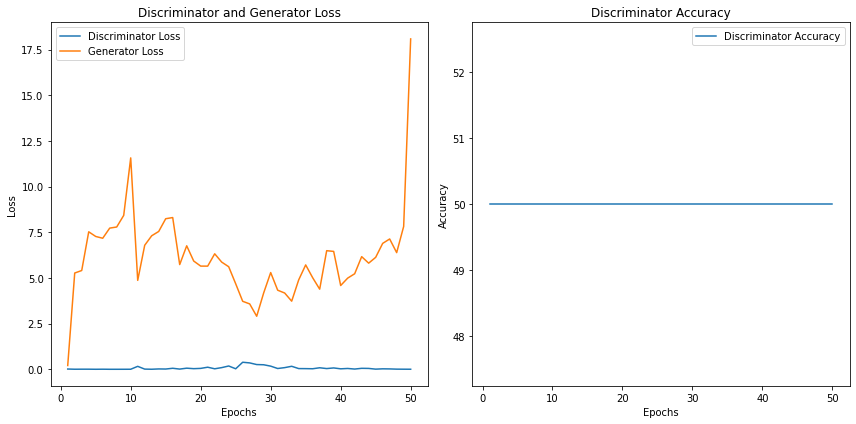

In [44]:
total_samples = x_train.shape[0]
batch_size = 1000  # Choose an appropriate batch size

# Lists to store loss and accuracy values for plotting
d_loss_values = []
g_loss_values = []
d_accuracy_values = []

# Training loop
epochs = 50
print('Progress')
for epoch in range(epochs):
    
    print(f'Epoch {epoch + 1}/{epochs}')

    # Randomly shuffle the dataset
    np.random.shuffle(x_train)

    # Mini-batch training
    for batch_start in range(0, total_samples, batch_size):
        batch_end = min(batch_start + batch_size, total_samples)

        # Generate random noise
        noise = generate_noise(batch_size, noise_dim)

        # Generate fake images using the generator
        generated_images = generator.predict(noise)

        # Select a batch of real images
        real_images = x_train[batch_start:batch_end]

        # Labels for the discriminator
        fake_labels = np.zeros((batch_size, 1))
        real_labels = np.ones((batch_size, 1))

        # Train the discriminator on real and fake images
        d_loss_fake = discriminator.train_on_batch(generated_images, fake_labels)
        d_loss_real = discriminator.train_on_batch(real_images, real_labels)
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

        # Generate new noise for the GAN
        noise = generate_noise(batch_size, noise_dim)

        # Labels for the generator (trick the discriminator)
        valid_labels = np.ones((batch_size, 1))

        # Train the GAN (only the generator part)
        g_loss = gan_model.train_on_batch(noise, valid_labels)

    # Store loss and accuracy values for plotting
    d_loss_values.append(d_loss[0])
    g_loss_values.append(g_loss)
    d_accuracy_values.append(100 * d_loss[1])

    # Print progress
    print(f'D Loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]} | G Loss: {g_loss}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), d_loss_values, label='Discriminator Loss')
plt.plot(range(1, epochs + 1), g_loss_values, label='Generator Loss')
plt.title('Discriminator and Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), d_accuracy_values, label='Discriminator Accuracy')
plt.title('Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

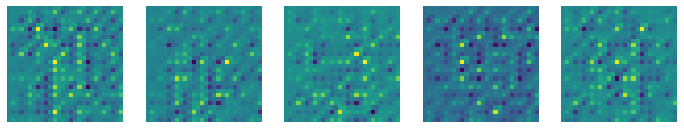

In [48]:
fig, axs = plt.subplots(1, 5, figsize=(12, 12))

for i in range(5):
    axs[i].imshow(generated_images[i])
    axs[i].axis('off')

plt.show()

In [20]:
def build_generator(noise_dim, target_image_shape):
    generator = Sequential()

    # Project and reshape the noise
    generator.add(layers.Dense(128 * (target_image_shape[0] // 4) * (target_image_shape[1] // 4), input_dim=noise_dim))
    generator.add(layers.LeakyReLU(alpha=0.2))
    generator.add(layers.Dense(256 * (target_image_shape[0] // 4) * (target_image_shape[1] // 4)))
    generator.add(layers.LeakyReLU(alpha=0.2))
    generator.add(layers.Dense(256 * (target_image_shape[0] // 4) * (target_image_shape[1] // 4)))
    generator.add(layers.LeakyReLU(alpha=0.2))
    generator.add(layers.Dense(512 * (target_image_shape[0] // 4) * (target_image_shape[1] // 4), activation = 'softmax'))
    generator.add(layers.Reshape((target_image_shape[0], target_image_shape[1], 32)))

    # Upsample using Conv2DTranspose layers
    generator.add(layers.Conv2DTranspose(64, kernel_size=3, strides=2, padding='same'))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU(alpha=0.2))

    generator.add(layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding='same'))
    generator.add(layers.BatchNormalization())
    generator.add(layers.LeakyReLU(alpha=0.2))

    # Output layer
    generator.add(layers.Conv2DTranspose(target_image_shape[1], kernel_size=3, activation='sigmoid', padding='same'))
    generator.add(layers.Conv2D(filters=1, kernel_size=(4, 4), padding='same', strides=2))
    generator.add(layers.Conv2DTranspose(1, kernel_size=1, strides=2, padding='same'))
    generator.add(Conv2D(1, kernel_size =2, strides =2, padding='same'))
    generator.add(Conv2D(1, kernel_size =2, strides =2, padding='same'))
    
    
    return generator

# Example usage
noise_dim = 100
target_image_shape = (28, 28, 1)  # Assuming MNIST-like data with shape (28, 28, 1)
generator2 = build_generator(noise_dim, target_image_shape)


generator2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 6272)              633472    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 6272)              0         
                                                                 
 dense_43 (Dense)            (None, 12544)             78688512  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 12544)             0         
                                                                 
 dense_44 (Dense)            (None, 12544)             157364480 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 12544)             0         
                                                                 
 dense_45 (Dense)            (None, 25088)            

In [19]:
def build_discriminator(input_shape):
    discriminator = models.Sequential()

    discriminator.add(layers.Conv2D(filters=4, kernel_size=(4, 4), padding='same', input_shape=input_shape))
    discriminator.add(layers.MaxPooling2D(pool_size=(2, 2)))

    discriminator.add(layers.Conv2D(filters=4, kernel_size=(4, 4), padding='same', strides=2))
    discriminator.add(layers.Flatten())

    discriminator.add(layers.Dense(256, activation='relu'))
    discriminator.add(layers.Dense(64, activation='relu'))
    discriminator.add(layers.Dense(10, activation='softmax'))

    return discriminator


def build_discriminator(input_shape):
    discriminator = models.Sequential()
    discriminator.add(layers.Conv2D(filters=10, kernel_size=(4, 4), padding='same', input_shape=input_shape, strides=2))
    discriminator.add(layers.MaxPooling2D(pool_size=(1, 1)))
    discriminator.add(layers.Conv2D(filters=10, kernel_size=(4, 4), padding='same', strides=2))
    discriminator.add(layers.MaxPooling2D(pool_size=(1, 1)))
    
    
    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(256, activation='relu'))
    discriminator.add(layers.Dense(64, activation='relu'))
    discriminator.add(layers.Dense(10, activation='relu'))
    discriminator.add(layers.Dense(1, activation='softmax'))
    return discriminator

discriminator2 = build_discriminator((28, 28, 1))
discriminator2.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 14, 14, 10)        170       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 10)          1610      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 7, 10)          0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 490)               0         
                                                                 
 dense_38 (Dense)            (None, 256)              

In [25]:
generator2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
discriminator2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

gan2 = build_gan(generator2, discriminator2)

gan2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
gan2.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 28, 28, 1)         551461321 
                                                                 
 sequential_8 (Sequential)   (None, 1)                 144585    
                                                                 
Total params: 551605906 (2.05 GB)
Trainable params: 551461129 (2.05 GB)
Non-trainable params: 144777 (565.54 KB)
_________________________________________________________________


In [ ]:
total_samples = x_train.shape[0]
batch_size = 1000  # Choose an appropriate batch size

# Lists to store loss and accuracy values for plotting
d_loss_values = []
g_loss_values = []
d_accuracy_values = []

# Training loop
epochs = 50
print('Progress')
for epoch in range(epochs):
    
    print(f'Epoch {epoch + 1}/{epochs}')

    # Randomly shuffle the dataset
    np.random.shuffle(x_train)

    # Mini-batch training
    for batch_start in range(0, total_samples, batch_size):
        batch_end = min(batch_start + batch_size, total_samples)

        # Generate random noise
        noise = generate_noise(batch_size, noise_dim)

        # Generate fake images using the generator
        generated_images = generator2.predict(noise)

        # Select a batch of real images
        real_images = x_train[batch_start:batch_end]

        # Labels for the discriminator
        fake_labels = np.zeros((batch_size, 1))
        real_labels = np.ones((batch_size, 1))

        # Train the discriminator on real and fake images
        d_loss_fake = discriminator2.train_on_batch(generated_images, fake_labels)
        d_loss_real = discriminator2.train_on_batch(real_images, real_labels)
        d_loss = 0.5 * np.add(d_loss_fake, d_loss_real)

        # Generate new noise for the GAN
        noise = generate_noise(batch_size, noise_dim)

        # Labels for the generator (trick the discriminator)
        valid_labels = np.ones((batch_size, 1))

        # Train the GAN (only the generator part)
        g_loss = gan2.train_on_batch(noise, valid_labels)

    # Store loss and accuracy values for plotting
    d_loss_values.append(d_loss[0])
    g_loss_values.append(g_loss)
    d_accuracy_values.append(100 * d_loss[1])

    # Print progress
    print(f'D Loss: {d_loss[0]} | D Accuracy: {100 * d_loss[1]} | G Loss: {g_loss}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), d_loss_values, label='Discriminator Loss')
plt.plot(range(1, epochs + 1), g_loss_values, label='Generator Loss')
plt.title('Discriminator and Generator Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), d_accuracy_values, label='Discriminator Accuracy')
plt.title('Discriminator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Progress
Epoch 1/50
32/32 [==============================] - 26s 685ms/step
